In [10]:
import torch
import math

In [11]:
emb_size = 200
dropout = 0.5
maxlen = 5000

In [12]:
# 变化率参数权重
theta = torch.exp(- torch.arange(0, emb_size, 2)* math.log(10000) / emb_size)
theta.shape

torch.Size([100])

In [13]:
# 位置索引张量
pos = torch.arange(0, maxlen).reshape(maxlen, 1)
pos.shape

torch.Size([5000, 1])

In [14]:
# 初始化位置权重矩阵
pos_embedding = torch.zeros((maxlen, emb_size))
pos_embedding.shape

torch.Size([5000, 200])

In [6]:
# 奇数行、偶数行词向量值分别对应正弦和余弦
pos_embedding[:, 0::2] = torch.sin(pos * theta)
pos_embedding[:, 1::2] = torch.cos(pos * theta)

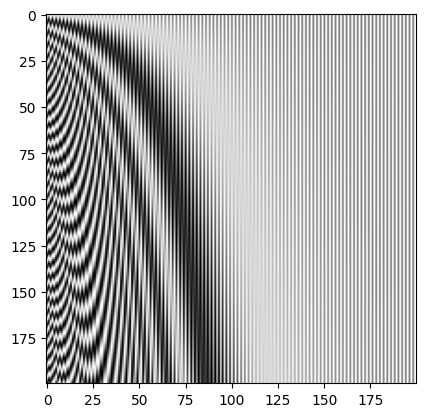

In [7]:
# 位置编码可视化
import matplotlib.pyplot as plt

plt.imshow(pos_embedding[:200], cmap='gray')
plt.show()

In [8]:
# 模拟传统embedding + positional_encoding
import torch.nn as nn

emb = nn.Embedding(200, 200)
pos_embedding = pos_embedding.unsqueeze(1)  # 和token_emb维度对齐

# 输入token_index
input_data = torch.randint(0,100, size=(200, 10))
# embedding输出
token_emb = emb(input_data)

# token_emb + pos_emb  [token_len, batch, emb_dim]
result_emb = token_emb + pos_embedding[:token_emb.size(0), :]

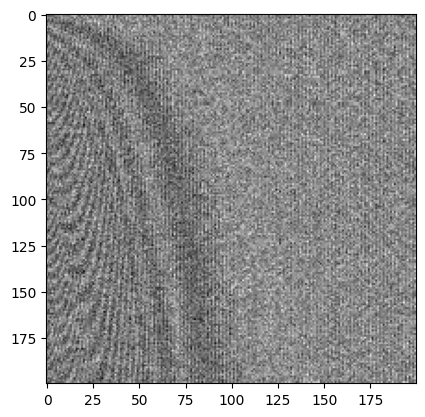

In [9]:
plt.imshow(result_emb[:,0].detach().numpy(), cmap='gray')
plt.show()